In [636]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import math

def avg(l):
    summ = 0
    for i in l:
        summ += i
    return summ/len(l)

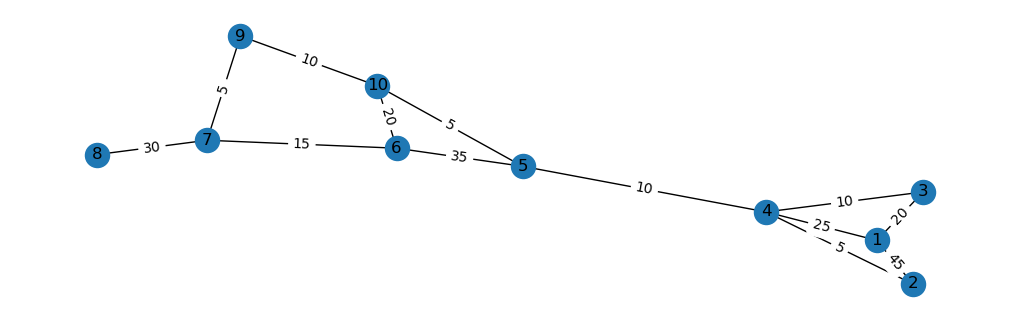

In [637]:
# Create an empty undirected graph
G = nx.Graph()
# Add edges along with their weights (each tuple represents an edge: (node1, node2, weight))
edges = [(1, 2, 45), (1, 3, 20), (1, 4, 25), (2, 4, 5), (3, 4, 10),
         (4, 5, 10), (5, 6, 35), (5, 10, 5), (6, 10, 20), (6, 7, 15), (7, 8, 30),
         (7, 9, 5), (9, 10, 10)]
plt.figure(figsize=(10,3))
# Add all edges to the graph at once
G.add_weighted_edges_from(edges)
# Draw the graph (with labels)
pos = nx.spring_layout(G)  # positions for all nodes
nx.draw(G, pos, with_labels=True)
# Draw the edge labels (weights)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.show()


In [638]:
# This function iterates through all the nodes in the network
# It then sums the weights of all incident edges for each node
# if maximum=True, return maximum of all such sums and a list of corresponding nodes 
# if maximum=False, return minmum of all such sums and list of corresponding nodes
def  node_strength(G, maximum=True):    
    
    # Get the nodes and their strengths
    strengths = G.degree(weight='weight')
    
    if(maximum == True):
        # Find the node(s) with the maximum strength
        max_strength = max(strengths, key=lambda x: x[1])[1]
        max_nodes = [node for node, strength in strengths if strength == max_strength]        
        return (max_strength, max_nodes)
    
    else:
        # Find the node(s) with the minimum strength
        min_strength = min(strengths, key=lambda x: x[1])[1]
        min_nodes = [node for node, strength in strengths if strength == min_strength]
        return (min_strength, min_nodes)
    
print('maximum node strength: ', node_strength(G,maximum=True)[0],
      ' node(s) with maximum strength: ', node_strength(G,maximum=True)[1])
print('minimum node strength: ', node_strength(G,maximum=False)[0],
      ' node(s) with minimum strength: ', node_strength(G,maximum=False)[1])

maximum node strength:  90  node(s) with maximum strength:  [1]
minimum node strength:  15  node(s) with minimum strength:  [9]


In [639]:
import copy
H = copy.deepcopy(G)
#removing weights
for n in H.edges(data=True):
    if 'weight' in n[2]:
        del n[2]['weight']
for node in H.nodes():
    print('Node: ', node,
          ' Closeness Centrality: ', nx.closeness_centrality(G, node))

Node:  1  Closeness Centrality:  0.375
Node:  2  Closeness Centrality:  0.36
Node:  3  Closeness Centrality:  0.36
Node:  4  Closeness Centrality:  0.5
Node:  5  Closeness Centrality:  0.5625
Node:  6  Closeness Centrality:  0.5
Node:  10  Closeness Centrality:  0.47368421052631576
Node:  7  Closeness Centrality:  0.4090909090909091
Node:  8  Closeness Centrality:  0.3
Node:  9  Closeness Centrality:  0.391304347826087


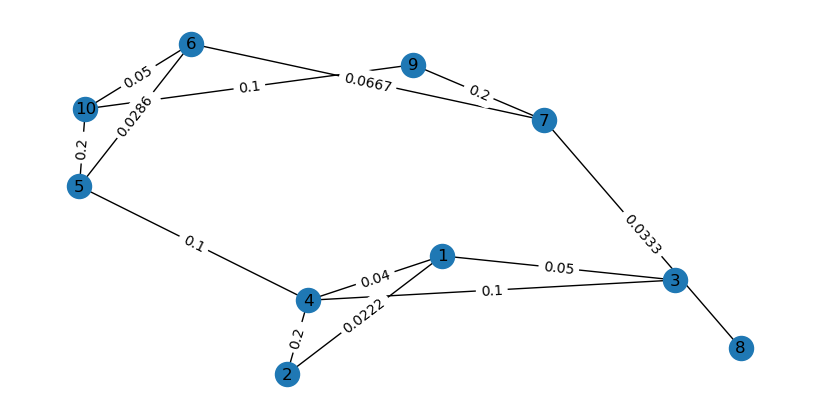

In [640]:
J = copy.deepcopy(G)
for u, v, d in J.edges(data=True):
    d['weight'] = round((1/d['weight']),4)
plt.figure(figsize=(8,4))
# Draw the graph (with labels)
pos = nx.spring_layout(J)  # positions for all nodes
nx.draw(G, pos, with_labels=True)
# Draw the edge labels (weights)
edge_labels = nx.get_edge_attributes(J, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.show()

In [641]:
centralities = nx.closeness_centrality(J,distance='weight')
centralities = sorted(centralities.items(), key=lambda x: x[1], reverse=True)

print('Closeness centralities of nodes in descending order:')
for i in centralities:
    print("Node: ", i[0], 'Closeness Centrailty: ', i[1])

Closeness centralities of nodes in descending order:
Node:  5 Closeness Centrailty:  8.167710318540703
Node:  6 Closeness Centrailty:  8.167710318540701
Node:  4 Closeness Centrailty:  6.912973346647209
Node:  10 Closeness Centrailty:  6.419858763107212
Node:  1 Closeness Centrailty:  6.15637184485943
Node:  7 Closeness Centrailty:  6.058974013733673
Node:  2 Closeness Centrailty:  5.489478499542543
Node:  8 Closeness Centrailty:  5.137572782281082
Node:  3 Closeness Centrailty:  4.833771953380954
Node:  9 Closeness Centrailty:  4.150334332487894


In [642]:
# Creating 100 G(n,p) random graphs for some fixed n, p values
# and storing the number of edges, avg degree, transitivity and
# diameter of each graph in a list of tuples

n = 60
p = (1/25)
graphs = []

for i in range (1,101):
    # creating a new random G(n,p) graph
    G = nx.gnp_random_graph(n,p)
    # storing the number of edges
    edges = len(G.edges)
    # storing the average degree of each graph
    avg_deg = sum(dict(G.degree()).values())/len(G)
    # storing the transitivity of each graph
    transitivity = nx.transitivity(G)
    # storing the maximum of the diameters of each component of the graph
    diameter = max([nx.diameter(G.subgraph(c)) for c in nx.connected_components(G)])
    # appending all graph statistics to our tuple list
    graphs.append((edges, avg_deg, transitivity, diameter))


In [643]:
cal_avg_edges = round(sum([graphs[i][0] for i in range(0, len(graphs))]) / len(graphs),2)
print('expected number of edges: ', round(((n*(n-1))/2)*p,2),
      ', calculated average number of edges: ', cal_avg_edges)

cal_avg_deg = round(sum([graphs[i][1] for i in range(0, len(graphs))]) / len(graphs),2)
print('expected average degree: ', round(((n-1)*p),2),
      ', calculated average degree: ', cal_avg_deg)

cal_avg_transitvity = round(sum([graphs[i][2] for i in range(0, len(graphs))]) / len(graphs),2)
print('expected transitivity: ', round(p,2),
      ', calculated average transitivity: ', cal_avg_transitvity)

cal_avg_diameter = round(sum([graphs[i][3] for i in range(0, len(graphs))]) / len(graphs),2)
print(f'expected diameter is on the order of ln({n}): ', round(math.log(n),2),
      ', calculated average diameter: ', cal_avg_diameter)


expected number of edges:  70.8 , calculated average number of edges:  71.9
expected average degree:  2.36 , calculated average degree:  2.4
expected transitivity:  0.04 , calculated average transitivity:  0.05
expected diameter is on the order of ln(60):  4.09 , calculated average diameter:  9.69


In [644]:
y_E = [graphs[i][0] for i in range(0,100)]
y_AD = [graphs[i][1] for i in range(0,100)]
y_T = [graphs[i][2] for i in range(0,100)]
y_D = [graphs[i][3] for i in range(0,100)]

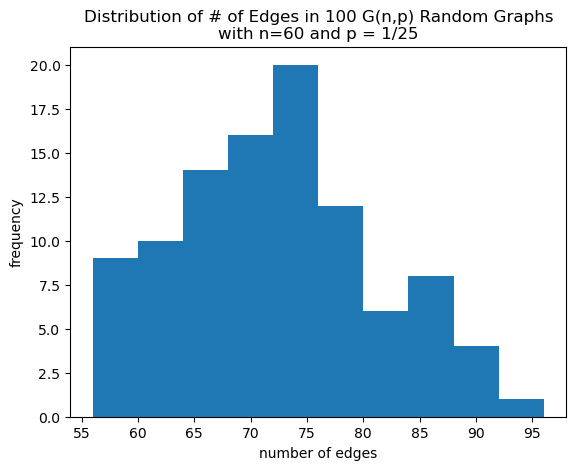

In [645]:
# histogram plotting the distrbution of the number of edges
plt.hist(y_E)
plt.xlabel('number of edges')
plt.ylabel('frequency')
plt.title('Distribution of # of Edges in 100 G(n,p) Random Graphs\nwith n=60 and p = 1/25')
plt.show()

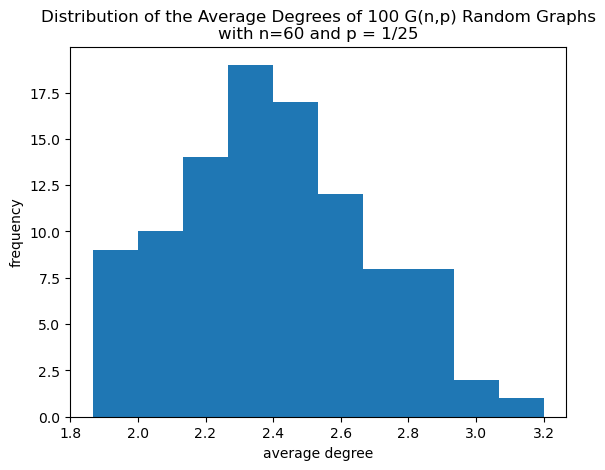

In [646]:
# histogram plotting the distrbution of the average degrees
plt.hist(y_AD)
plt.xlabel('average degree')
plt.ylabel('frequency')
plt.title('Distribution of the Average Degrees of 100 G(n,p) Random Graphs\nwith n=60 and p = 1/25')
plt.show()

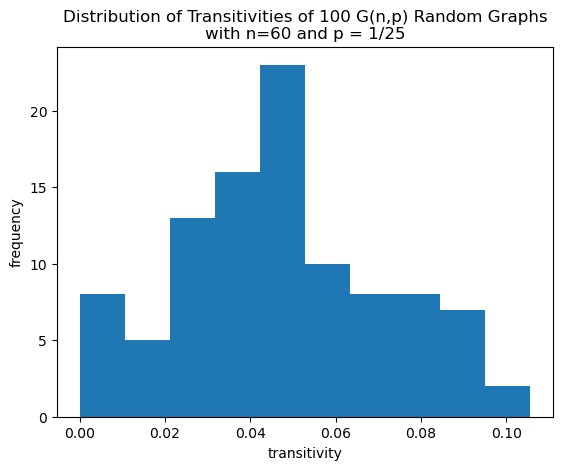

In [647]:
# histogram plotting the distrbution of the transitivities
plt.hist(y_T)
plt.xlabel('transitivity')
plt.ylabel('frequency')
plt.title('Distribution of Transitivities of 100 G(n,p) Random Graphs\nwith n=60 and p = 1/25')
plt.show()

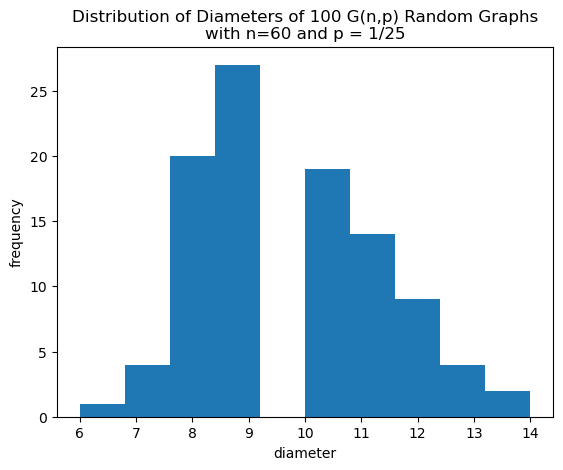

In [648]:
# histogram plotting the distrbution of the diameters
plt.hist(y_D)
plt.xlabel('diameter')
plt.ylabel('frequency')
plt.title('Distribution of Diameters of 100 G(n,p) Random Graphs\nwith n=60 and p = 1/25')
plt.show()